In [1]:
%matplotlib inline
import yfinance as yf
import pandas as pd
from IPython.core.debugger import set_trace

In [2]:
assets = {
    '278420.KS' : 'arirang_esg', 
    '279540.KS' : 'kodex_lowvol', #이건 사실 코덱스다 
    '244660.KS' : 'kodex_qual_plus', #이건 코덱스임
    '244670.KS' : 'kodex_value_plus', #이건 코덱스
    '279530.KS' : 'kodex_dvd_high', 
    '102110.KS' : 'tiger200', 
    '170350.KS' : 'tiger_beta_plus', 
    '217790.KS' : 'tiger_contrarian', 
    '211560.KS' : 'tiger_dvd_growth', 
    '123320.KS' : 'tiger_lev', 
    '147970.KS' : 'tiger_mtum', 
    '148070.KS' : 'kosef_ktb10y',
    '167860.KS' : 'kosef_ktb10y_lev'
}

In [3]:
symbols = ' '.join(assets.keys())
start = '2008-12-20'
end = '2021-09-30'
db = yf.download(symbols, start=start, end=end, threads=True)['Adj Close']
db = db.rename(columns=assets).fillna(method='ffill')

[*********************100%***********************]  13 of 13 completed


In [4]:
def rebuild(symbol, pkl='prices_kr.pkl'):
    market = db[symbol]
    
    if symbol in pd.read_pickle(pkl).reprice.unstack().columns:
        support = pd.read_pickle(pkl).reprice.unstack()[symbol].loc[market.index[0]:]
        df_r = pd.DataFrame({'support':support, 'market':market}).fillna(method='ffill').pct_change()
        df_p = (df_r.market.combine_first(df_r.support).fillna(0) + 1).cumprod()
        return df_p / df_p[-1] * market[-1]
    else:
        return market

<AxesSubplot:xlabel='Date'>

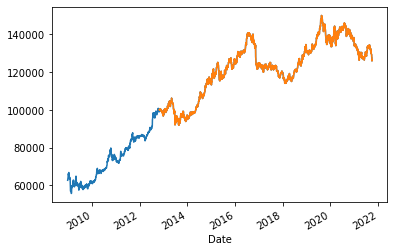

In [5]:
sym = 'kosef_ktb10y_lev'
rebuild(sym, pkl='prices_kr.pkl').plot()
db[sym].plot()

In [6]:
for name in assets.values():
    db[name] = rebuild(name, pkl='prices_kr.pkl')

In [7]:
pkl = pd.DataFrame()
pkl['close'] = db.stack()
pkl['high'] = db.stack()
pkl['low'] = db.stack()
pkl['underlying'] = db.stack()
pkl['reprice'] = db.stack(); pkl

close          high           low  \
Date                                                                    
2008-12-22 tiger200          15200.000000  15200.000000  15200.000000   
           tiger_lev          4917.293781   4917.293781   4917.293781   
           tiger_mtum         8589.253578   8589.253578   8589.253578   
           kosef_ktb10y      83555.730704  83555.730704  83555.730704   
           kosef_ktb10y_lev  62692.636864  62692.636864  62692.636864   
...                                   ...           ...           ...   
2021-09-29 kodex_qual_plus   10655.000000  10655.000000  10655.000000   
           kodex_value_plus  10145.000000  10145.000000  10145.000000   
           arirang_esg        9890.000000   9890.000000   9890.000000   
           kodex_dvd_high    10215.000000  10215.000000  10215.000000   
           kodex_lowvol      12185.000000  12185.000000  12185.000000   

                               underlying       reprice  
Date                                                     
2008-12-22 tiger200          15200.000000  15200.000000  
           tiger_lev          4917.293781   4917.293781  
           tiger_mtum         8589.253578   8589.253578  
           kosef_ktb10y      83555.730704  83555.730704  
           kosef_ktb10y_lev  62692.636864  62692.636864  
...                                   ...           ...  
2021-09-29 kodex_qual_plus   10655.000000  10655.000000  
           kodex_value_plus  10145.000000  10145.000000  
           arirang_esg        9890.000000   9890.000000  
           kodex_dvd_high    10215.000000  10215.000000  
           kodex_lowvol      12185.000000  12185.000000  

[40898 rows x 5 columns]

In [8]:
pkl.to_pickle('kr_20210930.pkl')